# News Classifier

In [1]:
#Required Imports
import os
import csv
import string
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#Required Imports For Text Classification
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection  import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#Code To Combine Multiple Files Into A Single File.
features = []
labels = []
direc = 'bbc/'
folders = os.listdir(direc)
translator = str.maketrans('','', string.punctuation)
stemmer = SnowballStemmer("english")

def parseOutText(all_text):
    '''
       Function To Remove Punctuations, Alpha-Numeric Words 
       And To Stem Those Words. 
    '''
    all_text = all_text.translate(translator).replace('\n', ' ')
    words_lst = all_text.split(' ')
    complete_sentence = ''
    for word in words_lst:
        word = stemmer.stem(word.strip())
        if word != '' and word.isalpha():
            complete_sentence += (word + ' ')

    return complete_sentence.strip()    

for folder in folders:
    path = (direc+folder)
    files = (os.listdir(path))
    for file in files:
        f = open(path+'/'+file)
        features.append(parseOutText(f.read()))
        labels.append(folder)
                
print('Total Number Of Data Points: ',len(features))
print('News Categories/Labels: ', Counter(labels))

Total Number Of Data Points:  2225
News Categories/Labels:  Counter({'sport': 511, 'business': 510, 'politics': 417, 'tech': 401, 'entertainment': 386})


In [3]:
#Splitting The Features And Labels Into Training And Testing Sets.
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, 
                                            test_size = 0.2, random_state = 100)

print('Number Of Data Points In Training Set: ',len(features_train))
print('Number Of Data Points In Testing Set: ',len(features_test))

Number Of Data Points In Training Set:  1780
Number Of Data Points In Testing Set:  445


In [4]:
#Implementing TfidfVectorizer To Extract Features From Text.
vectorizer = TfidfVectorizer(stop_words='english')
train_tfidf = vectorizer.fit_transform(features_train)
array = train_tfidf.toarray()
len(vectorizer.get_feature_names())

19060

In [5]:
#Lets Print The First Row Of Vectorized Array
print(array[0])

[0. 0. 0. ... 0. 0. 0.]


In [6]:
#The Vectorized Array Can Be Converted To Words Using The Inverse Function
print(vectorizer.inverse_transform(array[0]))

[array(['afterward', 'ahead', 'announc', 'asian', 'atp', 'beat', 'becam',
       'befor', 'bounc', 'carlo', 'chennai', 'claim', 'close', 'confirm',
       'contribut', 'decemb', 'decid', 'defend', 'differ', 'disast',
       'donat', 'effort', 'emerg', 'far', 'fee', 'fight', 'final',
       'finalist', 'follow', 'forc', 'fourtim', 'fund', 'hope', 'im',
       'increas', 'indian', 'kill', 'live', 'make', 'man', 'merced',
       'money', 'moya', 'nadu', 'open', 'paradorn', 'peopl', 'player',
       'pledg', 'prize', 'relief', 'said', 'scrichapan', 'second', 'seed',
       'set', 'spaniard', 'sponsor', 'srichaphan', 'success', 'tamil',
       'thai', 'thailand', 'tiebreak', 'titl', 'took', 'tour',
       'tournament', 'tsunami', 'unicef', 'unspecifi', 'victim', 'went',
       'win', 'winner', 'work'], dtype='<U31')]


In [7]:
#Lets Fit The Vectorized Data And Respective Labels To MultinomialNB
textClassifier = MultinomialNB()
textClassifier.fit(train_tfidf, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
#Lets Transform The Test Data To perform Predictions.
test_tfidf = vectorizer.transform(features_test)
pred = textClassifier.predict(test_tfidf)
print('The Accuracy: ',accuracy_score(pred, labels_test))

The Accuracy:  0.9730337078651685


In [9]:
#The Above Performed Steps For Vectorizing The Data And Then Fitting It To A Classifier Can Be Reduced As Follows.
#For This Model Lets Use A CountVectorizer
model = make_pipeline(CountVectorizer(stop_words='english'),MultinomialNB())
model.fit(features_train, labels_train)
pred = model.predict(features_test)
print('The Accuracy: ',accuracy_score(pred, labels_test))

The Accuracy:  0.9820224719101124


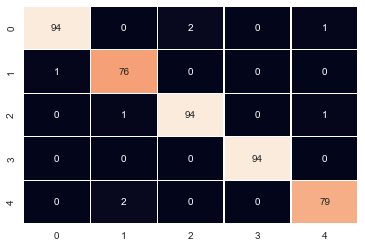

In [10]:
#confusion matrix
mat = confusion_matrix(pred, np.array(labels_test))
sns.heatmap(mat, cbar = False, fmt = 'd', annot = True, linewidths=.2)

In [11]:
#Now Lets Write A Fn That Can Be Used For Our Own Sample Examples.
def predict(s, model=model):
    pred = model.predict([s])
    return pred[0]

In [12]:
predict('Titanic is a classic')

'entertainment'

In [13]:
predict('cricket is a very famous sport in India')

'sport'